In [1]:
import os 
import sys

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from desilike.samples import Profiles, Chain, plotting

plt.style.use(os.path.join(os.path.abspath('../bin'), 'plot_style.mplstyle'))
plots_dir = '../../plots/'

In [2]:
tracer = 'ELG_LOPnotqso'
region = 'GCcomb'
zrange = (1.1, 1.6)
version = 'v4_1fixran'
data_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/{}'.format(version)
nmocks = 25

template_name = 'shapefitqisoqap'

emulator_dir = os.path.join(data_dir, 'emulators/emulators_{}_{}'.format(template_name, tracer))
chains_dir = os.path.join(data_dir, 'chains', 'chains_{}_{{}}_z{:.3f}-z{:.3f}_{{}}_{}'.format(template_name, zrange[0], zrange[1], region), 'physicalpriorbasis')

chain_altmtl_thetacut_25mocks = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer, 'altmtl'), 'power_velocileptors_ezmockscov_thetacut0.05_withshotnoise_{:d}.npy'.format(i))).remove_burnin(0.5)[::10] for i in range(8)])

chains_complete = [Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer[:7], 'complete'), 'power_mock{}_velocileptors_ezmockscov_withshotnoise_{:d}.npy'.format(imock, i))).remove_burnin(0.5)[::10] for i in range(8)]) for imock in range(nmocks)]
chains_complete_thetacut = [Chain.load(os.path.join(chains_dir.format(tracer[:7], 'complete'), 'power_importance_mock{}_velocileptors_ezmockscov_thetacut0.05_withshotnoise.npy'.format(imock))) for imock in range(nmocks)]
chains_complete_thetacut_sculptwindow = [Chain.load(os.path.join(chains_dir.format(tracer[:7], 'complete'), 'power_importance_mock{}_velocileptors_ezmockscov_thetacut0.05_sculptwindow_priors1.0_withshotnoise.npy'.format(imock))) for imock in range(nmocks)]
chains_altmtl = [Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer, 'altmtl'), 'power_mock{}_velocileptors_ezmockscov_withshotnoise_{:d}.npy'.format(imock, i))).remove_burnin(0.5)[::10] for i in range(8)]) for imock in range(nmocks)]
chains_altmtl_thetacut = [Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer, 'altmtl'), 'power_mock{}_velocileptors_ezmockscov_thetacut0.05_withshotnoise_{:d}.npy'.format(imock, i))).remove_burnin(0.5)[::10] for i in range(8)]) for imock in range(nmocks)]

In [4]:
chains_complete[0].params(varied=True)

ParameterCollection(['qiso', 'qap', 'dm', 'df', 'b1p', 'b2p', 'bsp', 'alpha0p', 'alpha2p', 'alpha4p', 'sn0p', 'sn2p', 'sn4p'])

qiso
Y1 error:  0.017055119897485906
theta-cut - complete: 0.00012311927603717354 +- 2.213822921539527e-05 (0.722% of DR1 error)
altmtl - complete: -0.00473693478045968 +- 0.0029208046131017997 (-27.774% of DR1 error)
theta-cut altmtl - complete: -0.004751022493670995 +- 0.003004676427851557 (-27.857% of DR1 error)
qap
Y1 error:  0.031190721145303357
theta-cut - complete: 0.00018674198061701563 +- 6.393578966770964e-05 (0.599% of DR1 error)
altmtl - complete: -0.03667406254465706 +- 0.005630976003116011 (-117.580% of DR1 error)
theta-cut altmtl - complete: 0.003917429122660239 +- 0.005978954643879994 (12.560% of DR1 error)
dm
Y1 error:  0.0479267450757663
theta-cut - complete: 0.0012315124179187091 +- 9.117928121407515e-05 (2.570% of DR1 error)
altmtl - complete: 0.027808277740074834 +- 0.00809361177436724 (58.022% of DR1 error)
theta-cut altmtl - complete: 0.012716041011203263 +- 0.008362415665447757 (26.532% of DR1 error)
df
Y1 error:  0.07471433076239598
theta-cut - complete: 0.0016

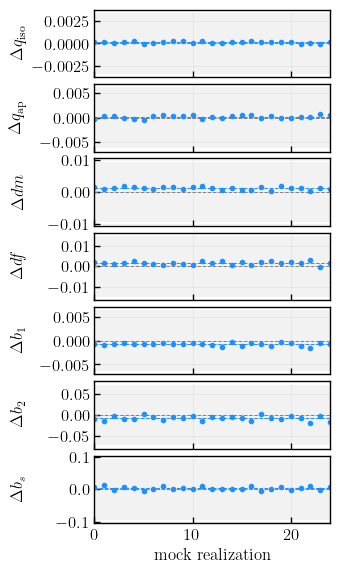

In [5]:
plt.rcParams["figure.autolayout"] = False

params = ['qiso', 'qap', 'dm', 'df', 'b1p', 'b2p', 'bsp']
ncols = len(params)
figsize = (3.5, ncols/1.2)
fig, lax = plt.subplots(ncols, 1, figsize=figsize, sharex=True)

diff_mean_list = []
diff_std_list = []
desi_y1_err_list = []

for iparam, param in enumerate(params):
    bestfit_vals = np.array([chain.mean(param) for chain in chains_complete])
    bestfit_vals_thetacut = np.array([chain.mean(param) for chain in chains_complete_thetacut])
    bestfit_diff = bestfit_vals_thetacut - bestfit_vals
    
    bestfit_vals_altmtl = np.array([chain.mean(param) for chain in chains_altmtl])
    bestfit_diff_altmtl = bestfit_vals_altmtl - bestfit_vals
    bestfit_vals_altmtl_thetacut = np.array([chain.mean(param) for chain in chains_altmtl_thetacut])
    bestfit_diff_altmtl_thetacut = bestfit_vals_altmtl_thetacut - bestfit_vals

    diff_mean = np.mean(bestfit_diff)
    diff_mean_list.append(diff_mean)
    diff_std = np.std(bestfit_diff)/5.
    diff_std_list.append(diff_std)

    diff_mean_altmtl = np.mean(bestfit_diff_altmtl)
    diff_std_altmtl = np.std(bestfit_diff_altmtl)/5.
    diff_mean_altmtl_thetacut = np.mean(bestfit_diff_altmtl_thetacut)
    diff_std_altmtl_thetacut = np.std(bestfit_diff_altmtl_thetacut)/5.

    # DESI Y1 error
    desi_y1_err = chain_altmtl_thetacut_25mocks.std(param)
    desi_y1_err_list.append(desi_y1_err)
    
    print(param)
    print('Y1 error: ', desi_y1_err)
    print('theta-cut - complete:', diff_mean, '+- {}'.format(diff_std), '({:.3f}% of DR1 error)'.format(diff_mean/desi_y1_err*100))
    print('altmtl - complete:', diff_mean_altmtl, '+- {}'.format(diff_std_altmtl), '({:.3f}% of DR1 error)'.format(diff_mean_altmtl/desi_y1_err*100))
    print('theta-cut altmtl - complete:', diff_mean_altmtl_thetacut, '+- {}'.format(diff_std_altmtl_thetacut), '({:.3f}% of DR1 error)'.format(diff_mean_altmtl_thetacut/desi_y1_err*100))
    
    x = np.arange(len(bestfit_diff))
    ax = lax[iparam]
    ax.axhline(0, ls='--', color='grey', lw=0.7)
    ax.axhline(diff_mean, ls='--', color='C0', lw=0.7)
    ax.fill_between(x, diff_mean - diff_std, diff_mean + diff_std, facecolor='C0', alpha=0.2)
    ax.plot(x, bestfit_diff, marker='.', ls='')
    #ax.axhline(diff_mean_altmtl, ls='--', color='C1', lw=0.7)
    #ax.fill_between(x, diff_mean_altmtl - diff_std_altmtl, diff_mean_altmtl + diff_std_altmtl, facecolor='C1', alpha=0.2)
    #ax.plot(x, bestfit_diff_altmtl, marker='.', ls='', color='C1')
    ax.set_ylabel(r'$\Delta$'+chains_complete[0].params()[param].latex(inline=True))
    
    ax.fill_between(x, -desi_y1_err/5., desi_y1_err/5., facecolor='grey', alpha=0.1)
    ax.set_ylim(-desi_y1_err/4.5, desi_y1_err/4.5)
    ax.set_xlim(0, np.max(x))
    ax.set_xticks([0, 10, 20])
    
ax.set_xlabel('mock realization')
fig = plt.gcf()
fig.align_ylabels()
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.savefig(os.path.join(plots_dir, version, 'power_mean_posterior_{}mocks_{}_complete_{}_z{:.1f}-{:.1f}_thetacut0.05_firstparams.pdf'.format(nmocks, tracer, region, zrange[0], zrange[1])), dpi=300)
plt.show()

alpha0p
Y1 error:  8.055676861944786
theta-cut - complete: -0.24015234747329084 +- 0.008198415782672013 (-2.981% of DR1 error)
alpha2p
Y1 error:  9.437510559058191
theta-cut - complete: -0.1510609129685172 +- 0.009196016786754042 (-1.601% of DR1 error)
alpha4p
Y1 error:  8.113705392069008
theta-cut - complete: 0.09331503604803626 +- 0.023365532201829034 (1.150% of DR1 error)
sn0p
Y1 error:  0.05715531014022217
theta-cut - complete: 0.06130276251084034 +- 0.0006483486338419444 (107.256% of DR1 error)
sn2p
Y1 error:  1.5852303016005216
theta-cut - complete: -1.4824546003629964 +- 0.01935517015161186 (-93.517% of DR1 error)
sn4p
Y1 error:  3.4321111797541715
theta-cut - complete: -0.3863506388060082 +- 0.02600920176719338 (-11.257% of DR1 error)


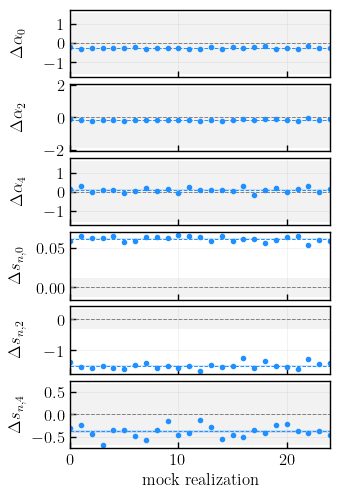

In [6]:
params = ['alpha0p', 'alpha2p', 'alpha4p', 'sn0p', 'sn2p', 'sn4p']
ncols = len(params)
figsize = (3.5, ncols/1.18)
fig, lax = plt.subplots(ncols, 1, figsize=figsize, sharex=True)

diff_mean_list = []
diff_std_list = []
desi_y1_err_list = []

for iparam, param in enumerate(params):
    bestfit_vals = np.array([chain.mean(param) for chain in chains_complete])
    bestfit_vals_thetacut = np.array([chain.mean(param) for chain in chains_complete_thetacut])
    bestfit_diff = bestfit_vals_thetacut - bestfit_vals

    diff_mean = np.mean(bestfit_diff)
    diff_mean_list.append(diff_mean)
    diff_std = np.std(bestfit_diff)/5.
    diff_std_list.append(diff_std)
    
    # DESI Y1 error
    desi_y1_err = chain_altmtl_thetacut_25mocks.std(param)
    desi_y1_err_list.append(desi_y1_err)
    
    print(param)
    print('Y1 error: ', desi_y1_err)
    print('theta-cut - complete:', diff_mean, '+- {}'.format(diff_std), '({:.3f}% of DR1 error)'.format(diff_mean/desi_y1_err*100))
    
    x = np.arange(len(bestfit_diff))
    ax = lax[iparam]
    ax.axhline(0, ls='--', color='grey', lw=0.7)
    ax.axhline(diff_mean, ls='--', color='C0', lw=0.7)
    ax.fill_between(x, diff_mean - diff_std, diff_mean + diff_std, facecolor='C0', alpha=0.2)
    ax.plot(x, bestfit_diff, marker='.', ls='')
    ax.set_ylabel(r'$\Delta$'+chains_complete[0].params()[param].latex(inline=True))
    
    ax.fill_between(x, -desi_y1_err/5., desi_y1_err/5., facecolor='grey', alpha=0.1)
    #ax.set_ylim(-desi_y1_err/4.5, desi_y1_err/4.5)
    ax.set_xlim(0, np.max(x))
    ax.set_xticks([0, 10, 20])
    
ax.set_xlabel('mock realization')
fig = plt.gcf()
fig.align_ylabels()
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.savefig(os.path.join(plots_dir, version, 'power_mean_posterior_{}mocks_{}_complete_{}_z{:.1f}-{:.1f}_thetacut0.05_otherparams.pdf'.format(nmocks, tracer, region, zrange[0], zrange[1])), dpi=300)
plt.show()

In [13]:
import tabulate

quantities = ['', r'$\theta$-cut complete', r'altMTL', r'$\theta$-cut altMTL', 'DR1 error']
data = []
for param in ['qiso', 'qap', 'dm', 'df', 'sn0p', 'sn2p', 'b1p', 'b2p', 'bsp']:
    row = []
    param_latex = chain_altmtl_thetacut_25mocks[0][param].param.latex(inline=True)
    rowname = r'{} $-$ {}$(\mathrm{{complete}})$'.format(param_latex, param_latex)
    row.append(rowname)
    desi_y1_err = chain_altmtl_thetacut_25mocks.std(param)
    
    bestfit_vals_complete = np.array([chain.mean(param) for chain in chains_complete])
    
    for i, chains in enumerate([chains_complete_thetacut, chains_altmtl, chains_altmtl_thetacut]):
        bestfit_vals = np.array([chain.mean(param) for chain in chains])
        bestfit_diff = bestfit_vals - bestfit_vals_complete

        diff_mean = np.mean(bestfit_diff)
        diff_std = np.std(bestfit_diff)/5.
        if i==0:
            row.append(r'${:.2g} \pm {:.2g}$'.format(diff_mean, diff_std))
        else:
            row.append(r'${:.4f} \pm {:.4f}$'.format(diff_mean, diff_std))
    row.append(r'{:.2g}'.format(desi_y1_err))
    data.append(row)
tab = tabulate.tabulate(data, headers=quantities, tablefmt='latex_raw')
print(tab)

\begin{tabular}{llllr}
\hline
                                                                & $\theta$-cut complete   & altMTL               & $\theta$-cut altMTL   &   DR1 error \\
\hline
 $q_{\mathrm{iso}}$ $-$ $q_{\mathrm{iso}}$$(\mathrm{complete})$ & $0.00012 \pm 2.2e-05$   & $-0.0047 \pm 0.0029$ & $-0.0048 \pm 0.0030$  &       0.017 \\
 $q_{\mathrm{ap}}$ $-$ $q_{\mathrm{ap}}$$(\mathrm{complete})$   & $0.00019 \pm 6.4e-05$   & $-0.0367 \pm 0.0056$ & $0.0039 \pm 0.0060$   &       0.031 \\
 $dm$ $-$ $dm$$(\mathrm{complete})$                             & $0.0012 \pm 9.1e-05$    & $0.0278 \pm 0.0081$  & $0.0127 \pm 0.0084$   &       0.048 \\
 $df$ $-$ $df$$(\mathrm{complete})$                             & $0.0017 \pm 0.00015$    & $0.0777 \pm 0.0109$  & $0.0023 \pm 0.0121$   &       0.075 \\
 $s_{n, 0}$ $-$ $s_{n, 0}$$(\mathrm{complete})$                 & $0.061 \pm 0.00065$     & $0.0994 \pm 0.0095$  & $0.2957 \pm 0.0105$   &       0.057 \\
 $s_{n, 2}$ $-$ $s_{n, 2}$$(\mathrm{com

## with window rotation

qiso
Y1 error:  0.017055119897485906
theta-cut - complete: -0.001724809898620121 +- 5.497230710616942e-05 (-10.113% of DR1 error)
qap
Y1 error:  0.031190721145303357
theta-cut - complete: 0.0019885153970665838 +- 0.00015003210127749862 (6.375% of DR1 error)
dm
Y1 error:  0.0479267450757663
theta-cut - complete: 0.004962618241453509 +- 0.00037750381476859055 (10.355% of DR1 error)
df
Y1 error:  0.07471433076239598
theta-cut - complete: -0.0023941965643270845 +- 0.00047823243764886765 (-3.204% of DR1 error)
b1p
Y1 error:  0.031907283100042795
theta-cut - complete: 0.0006669790480395088 +- 0.00015223872836892145 (2.090% of DR1 error)
b2p
Y1 error:  0.35933370554449034
theta-cut - complete: -0.005311327629467082 +- 0.0018672354000371211 (-1.478% of DR1 error)
bsp
Y1 error:  0.4654002864809107
theta-cut - complete: 0.01205490050348125 +- 0.002152348464725425 (2.590% of DR1 error)


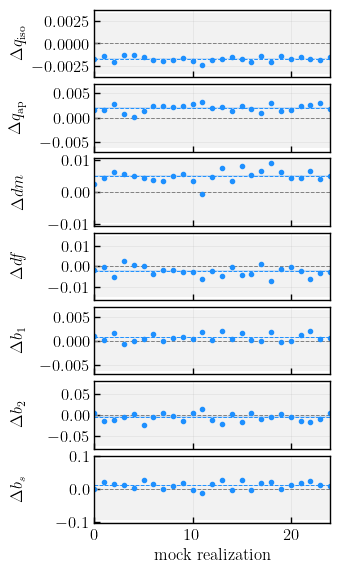

In [8]:
nmocks=2

params = ['qiso', 'qap', 'dm', 'df', 'b1p', 'b2p', 'bsp']
ncols = len(params)
figsize = (3.5, ncols/1.2)
fig, lax = plt.subplots(ncols, 1, figsize=figsize, sharex=True)

diff_mean_list = []
diff_std_list = []
desi_y1_err_list = []

for iparam, param in enumerate(params):
    bestfit_vals = np.array([chain.mean(param) for chain in chains_complete])
    bestfit_vals_thetacut_sculptwindow = np.array([chain.mean(param) for chain in chains_complete_thetacut_sculptwindow])
    bestfit_diff = bestfit_vals_thetacut_sculptwindow - bestfit_vals
    
    diff_mean = np.mean(bestfit_diff)
    diff_mean_list.append(diff_mean)
    diff_std = np.std(bestfit_diff)/5.
    diff_std_list.append(diff_std)

    # DESI Y1 error
    desi_y1_err = chain_altmtl_thetacut_25mocks.std(param)
    desi_y1_err_list.append(desi_y1_err)
    
    print(param)
    print('Y1 error: ', desi_y1_err)
    print('theta-cut - complete:', diff_mean, '+- {}'.format(diff_std), '({:.3f}% of DR1 error)'.format(diff_mean/desi_y1_err*100))
    
    x = np.arange(len(bestfit_diff))
    ax = lax[iparam]
    ax.axhline(0, ls='--', color='grey', lw=0.7)
    ax.axhline(diff_mean, ls='--', color='C0', lw=0.7)
    ax.fill_between(x, diff_mean - diff_std, diff_mean + diff_std, facecolor='C0', alpha=0.2)
    ax.plot(x, bestfit_diff, marker='.', ls='')
    ax.set_ylabel(r'$\Delta$'+chains_complete[0].params()[param].latex(inline=True))
    
    ax.fill_between(x, -desi_y1_err/5., desi_y1_err/5., facecolor='grey', alpha=0.1)
    #ax.set_ylim(-desi_y1_err/4.5, desi_y1_err/4.5)
    ax.set_xlim(0, np.max(x))
    ax.set_xticks([0, 10, 20])
    
ax.set_xlabel('mock realization')
fig = plt.gcf()
fig.align_ylabels()
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.savefig(os.path.join(plots_dir, version, 'power_mean_posterior_{}mocks_{}_complete_{}_z{:.1f}-{:.1f}_thetacut0.05_sculptwindow_firstparams.pdf'.format(nmocks, tracer, region, zrange[0], zrange[1])), dpi=300)
plt.show()

alpha0p
Y1 error:  8.055676861944786
theta-cut - complete: 0.0696013919460366 +- 0.023775947128061727 (0.864% of DR1 error)
alpha2p
Y1 error:  9.437510559058191
theta-cut - complete: -0.3301686650829383 +- 0.016900356795307193 (-3.498% of DR1 error)
alpha4p
Y1 error:  8.113705392069008
theta-cut - complete: -1.2466923457756842 +- 0.03401054723036012 (-15.365% of DR1 error)
sn0p
Y1 error:  0.05715531014022217
theta-cut - complete: -0.12582007630455244 +- 0.0020917199090034495 (-220.137% of DR1 error)
sn2p
Y1 error:  1.5852303016005216
theta-cut - complete: 1.3053717934726763 +- 0.03296009071236478 (82.346% of DR1 error)
sn4p
Y1 error:  3.4321111797541715
theta-cut - complete: -0.6377467693223317 +- 0.04255286882785402 (-18.582% of DR1 error)


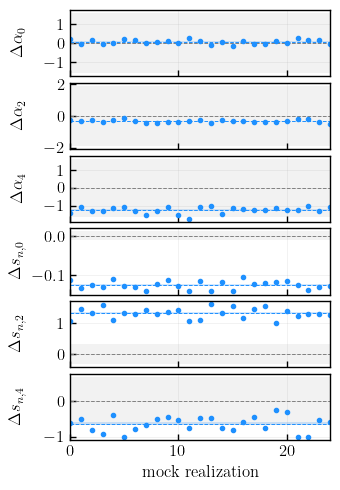

In [9]:
params = ['alpha0p', 'alpha2p', 'alpha4p', 'sn0p', 'sn2p', 'sn4p']
ncols = len(params)
figsize = (3.5, ncols/1.2)
fig, lax = plt.subplots(ncols, 1, figsize=figsize, sharex=True)

diff_mean_list = []
diff_std_list = []
desi_y1_err_list = []

for iparam, param in enumerate(params):
    bestfit_vals = np.array([chain.mean(param) for chain in chains_complete])
    bestfit_vals_thetacut_sculptwindow = np.array([chain.mean(param) for chain in chains_complete_thetacut_sculptwindow])
    bestfit_diff = bestfit_vals_thetacut_sculptwindow - bestfit_vals
    
    diff_mean = np.mean(bestfit_diff)
    diff_mean_list.append(diff_mean)
    diff_std = np.std(bestfit_diff)/5.
    diff_std_list.append(diff_std)

    # DESI Y1 error
    desi_y1_err = chain_altmtl_thetacut_25mocks.std(param)
    desi_y1_err_list.append(desi_y1_err)
    
    print(param)
    print('Y1 error: ', desi_y1_err)
    print('theta-cut - complete:', diff_mean, '+- {}'.format(diff_std), '({:.3f}% of DR1 error)'.format(diff_mean/desi_y1_err*100))
    
    x = np.arange(len(bestfit_diff))
    ax = lax[iparam]
    ax.axhline(0, ls='--', color='grey', lw=0.7)
    ax.axhline(diff_mean, ls='--', color='C0', lw=0.7)
    ax.fill_between(x, diff_mean - diff_std, diff_mean + diff_std, facecolor='C0', alpha=0.2)
    ax.plot(x, bestfit_diff, marker='.', ls='')
    ax.set_ylabel(r'$\Delta$'+chains_complete[0].params()[param].latex(inline=True))
    
    ax.fill_between(x, -desi_y1_err/5., desi_y1_err/5., facecolor='grey', alpha=0.1)
    #ax.set_ylim(-desi_y1_err/4.5, desi_y1_err/4.5)
    ax.set_xlim(0, np.max(x))
    ax.set_xticks([0, 10, 20])
    
ax.set_xlabel('mock realization')
fig = plt.gcf()
fig.align_ylabels()
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.savefig(os.path.join(plots_dir, version, 'power_mean_posterior_{}mocks_{}_complete_{}_z{:.1f}-{:.1f}_thetacut0.05_sculptwindow_otherparams.pdf'.format(nmocks, tracer, region, zrange[0], zrange[1])), dpi=300)
plt.show()

In [10]:
import tabulate

quantities = ['', r'$\theta$-cut complete', 'DR1 error']
data = []
for param in ['qiso', 'qap', 'dm', 'df', 'sn0p', 'sn2p', 'b1p', 'b2p', 'bsp']:
    row = []
    param_latex = chain_altmtl_thetacut_25mocks[0][param].param.latex(inline=True)
    rowname = r'{} $-$ {}$(\mathrm{{complete}})$'.format(param_latex, param_latex)
    row.append(rowname)
    desi_y1_err = chain_altmtl_thetacut_25mocks.std(param)
    
    bestfit_vals_complete = np.array([chain.mean(param) for chain in chains_complete])
    
    bestfit_vals = np.array([chain.mean(param) for chain in chains_complete_thetacut_sculptwindow])
    bestfit_diff = bestfit_vals - bestfit_vals_complete

    diff_mean = np.mean(bestfit_diff)
    diff_std = np.std(bestfit_diff)/5.
    row.append(r'${:.2g} \pm {:.2g}$'.format(diff_mean, diff_std))
    row.append(r'{:.2g}'.format(desi_y1_err))
    data.append(row)
tab = tabulate.tabulate(data, headers=quantities, tablefmt='latex_raw')
print(tab)

\begin{tabular}{llr}
\hline
                                                                & $\theta$-cut complete   &   DR1 error \\
\hline
 $q_{\mathrm{iso}}$ $-$ $q_{\mathrm{iso}}$$(\mathrm{complete})$ & $-0.0017 \pm 5.5e-05$   &       0.017 \\
 $q_{\mathrm{ap}}$ $-$ $q_{\mathrm{ap}}$$(\mathrm{complete})$   & $0.002 \pm 0.00015$     &       0.031 \\
 $dm$ $-$ $dm$$(\mathrm{complete})$                             & $0.005 \pm 0.00038$     &       0.048 \\
 $df$ $-$ $df$$(\mathrm{complete})$                             & $-0.0024 \pm 0.00048$   &       0.075 \\
 $s_{n, 0}$ $-$ $s_{n, 0}$$(\mathrm{complete})$                 & $-0.13 \pm 0.0021$      &       0.057 \\
 $s_{n, 2}$ $-$ $s_{n, 2}$$(\mathrm{complete})$                 & $1.3 \pm 0.033$         &       1.6   \\
 $b_{1}$ $-$ $b_{1}$$(\mathrm{complete})$                       & $0.00067 \pm 0.00015$   &       0.032 \\
 $b_{2}$ $-$ $b_{2}$$(\mathrm{complete})$                       & $-0.0053 \pm 0.0019$    &       0.36  \\
 $